#### 向量化的重要性

In [1]:
import numpy as np
import time 

In [2]:
a=np.random.rand(1000000)
b=np.random.rand(1000000)
tic=time.time()
c=np.dot(a,b)
toc=time.time()# 分别测试当下的时间
print('Vectorized vertion'+str(1000*(toc-tic))+'ms')


Vectorized vertion0.8418560028076172ms


In [3]:
aa=np.array([1,2,3,4])
bb=np.array([2,2,2,2])
print(np.dot(aa,bb))
print(aa*bb)


20
[2 4 6 8]


In [4]:
c=0
tic=time.time()
for i in range(1000000):
    c += a[i]*b[i]
    pass
toc=time.time()
print(c)
print('For loop'+str(1000*(toc-tic))+'ms')

250218.24453384057
For loop304.33106422424316ms


In [8]:
a=np.array([[1,2,3,4],[5,6,7,8]])
b=np.array([2,2,2,2])
a*b

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16]])

In [9]:
np.dot(a,b)# 就是矩阵的乘法

array([20, 52])

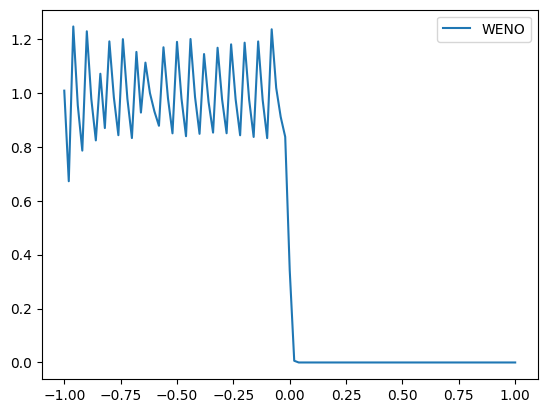

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数和初值
dx = 0.02
dt = 0.01
t_end = 0.4
x_end = 1.0
x = np.arange(-1, 1+dx, dx)
t = np.arange(0, t_end+dt, dt)
c = 1.0
gamma = 2.0

def flux(u):
    # 定义通量函数
    return 0.5*u**2

def weno(u):
    # WENO算法的实现
    u_right = np.roll(u, -1)
    u_left = np.roll(u, 1)
    u_r1 = (1./3)*u + (2./3)*u_right
    u_l1 = (2./3)*u + (1./3)*u_left
    u_r2 = (1./2)*u + (1./2)*u_right
    u_l2 = (1./2)*u + (1./2)*u_left
    flux_r1 = flux(u_r1)
    flux_l1 = flux(u_l1)
    flux_r2 = flux(u_r2)
    flux_l2 = flux(u_l2)
    beta_r1 = (u - u_right)**2
    beta_l1 = (u_left - u)**2
    beta_r2 = (u - u_right)**2 + (13./3)*((u - u_r1)**2)
    beta_l2 = (u_left - u)**2 + (13./3)*((u_l1 - u)**2)
    alpha_r1 = (1./10)/(1.e-6 + beta_r1)**2
    alpha_l1 = (1./10)/(1.e-6 + beta_l1)**2
    alpha_r2 = (3./10)/(1.e-6 + beta_r2)**2
    alpha_l2 = (3./10)/(1.e-6 + beta_l2)**2
    w_r1 = alpha_r1/(alpha_r1 + alpha_l1)
    w_l1 = alpha_l1/(alpha_r1 + alpha_l1)
    w_r2 = alpha_r2/(alpha_r2 + alpha_l2)
    w_l2 = alpha_l2/(alpha_r2 + alpha_l2)
    u_r = w_r1*flux_r1 + w_l1*flux_l1 - w_r2*flux_r2 + w_l2*flux_l2
    return u_r - np.roll(u_r, 1)

# 初值
u = np.zeros((len(x), ))
u[:int(len(x)/2)] = 1.0

# 迭代求解
for n in range(int(t_end/dt)):
    # 使用RK3时间离散格式
    k1 = -weno(u)
    k2 = -weno(u + dt*k1/2)
    k3 = -weno(u - dt*k1 + 2*dt*k2)
    u += dt/6*(k1 + 4*k2 + k3)
    
# 画图展示结果
plt.plot(x, u, label="WENO")
plt.legend()
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
nx = 400 # number of grid points
L = 2.0 # length of the domain
x = np.linspace(-L/2, L/2, nx)
dx = x[1] - x[0]

# Define the time step
CFL = 0.8 # CFL number
t_final = 0.5 # final time
dt = CFL * dx / np.max(np.abs(x))

# Define the initial condition
u0 = np.exp(-x**2)

# Define the flux function
def f(u):
    return 0.5*u**2

# Define the WENO5 reconstruction
def WENO5(u):
    u_minus = np.roll(u, 1)
    u_plus = np.roll(u, -1)
    u_minus2 = np.roll(u, 2)
    u_plus2 = np.roll(u, -2)
    u_minus3 = np.roll(u, 3)
    u_plus3 = np.roll(u, -3)
    
    eps = 1e-6
    beta0 = 13/12 * (u - 2*u_plus + u_plus2)**2 + 1/4 * (3*u - 4*u_plus + u_plus2)**2
    beta1 = 13/12 * (u_minus - 2*u + u_plus)**2 + 1/4 * (u_minus - u_plus)**2
    beta2 = 13/12 * (u_minus2 - 2*u_minus + u)**2 + 1/4 * (u_minus2 - 4*u_minus + 3*u)**2
    beta3 = 13/12 * (u_minus3 - 2*u_minus2 + u_minus)**2 + 1/4 * (u_minus3 - 4*u_minus2 + 3*u_minus)**2
    
    alpha0 = 0.1 / (eps + beta0)**2
    alpha1 = 0.6 / (eps + beta1)**2
    alpha2 = 0.3 / (eps + beta2)**2
    alpha3 = 0.0 / (eps + beta3)**2
    
    w0 = alpha0 / (alpha0 + alpha1 + alpha2 + alpha3)
    w1 = alpha1 / (alpha0 + alpha1 + alpha2 + alpha3)
    w2 = alpha2 / (alpha0 + alpha1 + alpha2 + alpha3)
    w3 = alpha3 / (alpha0 + alpha1 + alpha2 + alpha3)
    
    u_L = w0 * (2*u - 7*u_plus + 11*u_plus2) / 6 + \
          w1 * (-u_minus + 5*u - 2*u_plus) / 6 + \
          w2 * (2*u_minus - u) / 6 + \
          w3 * (u_minus3 - 4*u_minus2 + 5*u_minus) / 6
          
    u_R = w0 * (5*u_minus2 - 4*u_minus + u) / 6 + \
          w1 * (2*u_minus - 5*u + u_plus) / 6 + \
          w2 * (-u_minus + 5*u - 2*u_plus) / 6 + \
          w3 * (11*u - 7*u_plus - 2*u_plus2) / 6
    
    return u


#### 避免使用 for

In [8]:
a = np.array([[1,2,3,4],[2,3,4,5]])
a

array([[1, 2, 3, 4],
       [2, 3, 4, 5]])

In [9]:
a.T

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5]])

In [10]:
a+1# 会在每一个元素中加1


array([[2, 3, 4, 5],
       [3, 4, 5, 6]])

In [13]:
A = np.array([[56,0,4.4,68],
              [1.2,104,52,8],
              [1.8,135,99,0.9]])
A

array([[ 56. ,   0. ,   4.4,  68. ],
       [  1.2, 104. ,  52. ,   8. ],
       [  1.8, 135. ,  99. ,   0.9]])

In [21]:
cal = A.sum(axis=0)#0 is column,1 is row
print(cal,cal.shape)

[ 59.  239.  155.4  76.9] (4,)


In [26]:
a=np.array([[1,2,3],[2,2,2]])
b=a.reshape(1,6)


(1, 6)

In [27]:
percentage = 100*A/cal.reshape(1,4)# 虽然这里cal已经是1*4，但是养成好习惯，
#为了保证运算的进行，调用一下这个函数 ，而且代价很低
percentage

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

#### 不能进行 下面的操作

In [32]:
a = np.array([1,2,4,5,5,6,7,8])
a.reshape(1,4)

ValueError: cannot reshape array of size 8 into shape (1,4)

#### 一些对于numpy操作的可能小bug以及技巧

In [35]:
a = np.random.randn(5)
a

array([ 1.29531359,  1.65985566,  0.34158469, -0.73004353, -0.76306197])

In [36]:
a.shape

(5,)

In [37]:
a.T

array([ 1.29531359,  1.65985566,  0.34158469, -0.73004353, -0.76306197])

In [38]:
a.T.shape

(5,)

In [39]:
a*a.T

array([1.67783731, 2.75512082, 0.1166801 , 0.53296356, 0.58226356])

In [40]:
np.dot(a,a.T)#这说明 这是一维数组 

5.664865350162008

##### （1，5）和（5，）区别

In [43]:
a = np.random.randn(4,1)
a

array([[-0.97247167],
       [ 0.84226148],
       [-0.22792054],
       [-1.08642718]])

In [44]:
np.dot(a,a.T)

array([[ 0.94570115, -0.81907543,  0.22164627,  1.05651966],
       [-0.81907543,  0.7094044 , -0.19196869, -0.91505577],
       [ 0.22164627, -0.19196869,  0.05194777,  0.24761908],
       [ 1.05651966, -0.91505577,  0.24761908,  1.18032403]])

为了防止出现行列数不匹配的情况，可以使用断言语句

In [48]:
# 断言语句的例子
a=1 
b=2 
assert(a>b)# 不符合的时候 会报错